In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

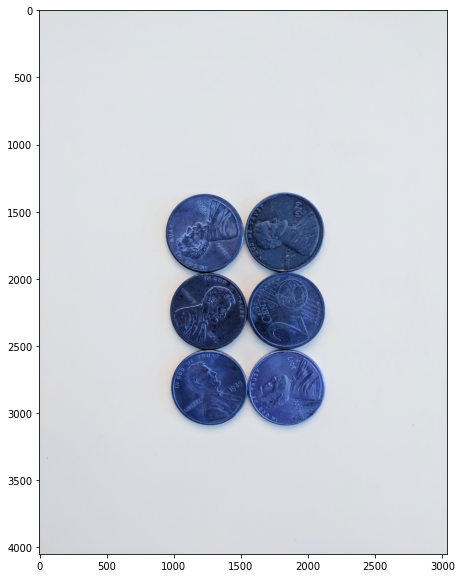

In [2]:
sep_coins = cv2.imread('pennies.jpg')
display(sep_coins)

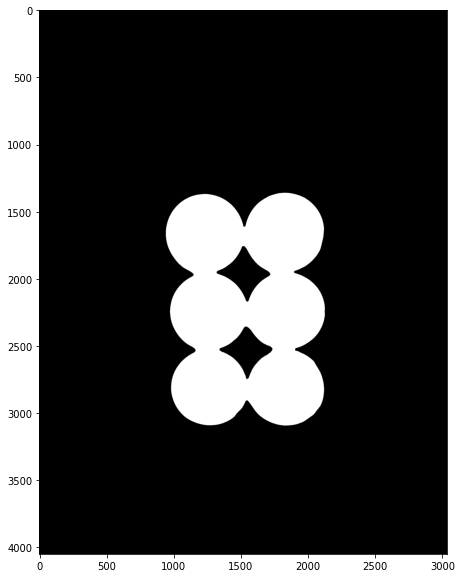

In [4]:
# MEDIAN BLUR
# Grayscale
# Binary Threshold
# Find Contours

sep_blur = cv2.medianBlur(sep_coins,25)
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(th1)

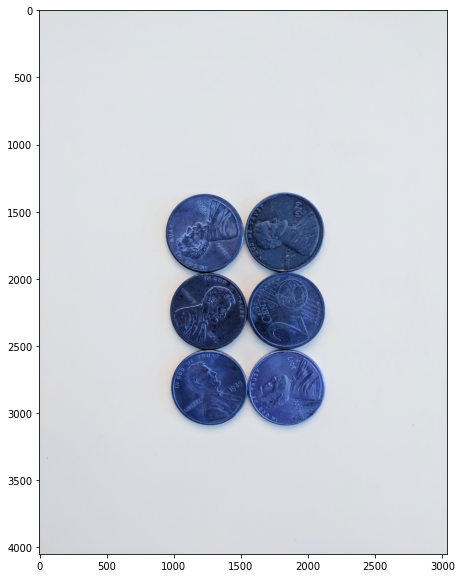

In [6]:
display(sep_coins)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

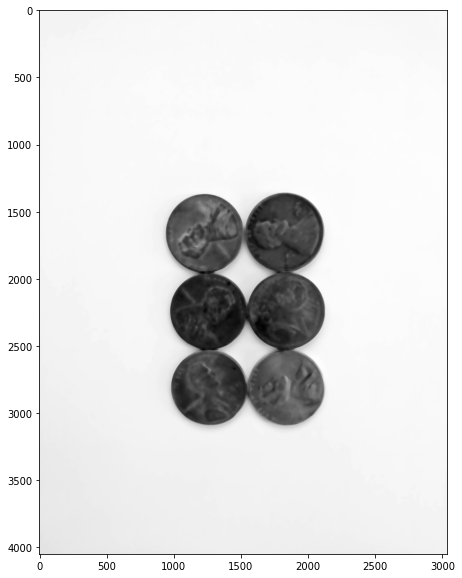

In [8]:
display(gray_sep_coins)

In [9]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

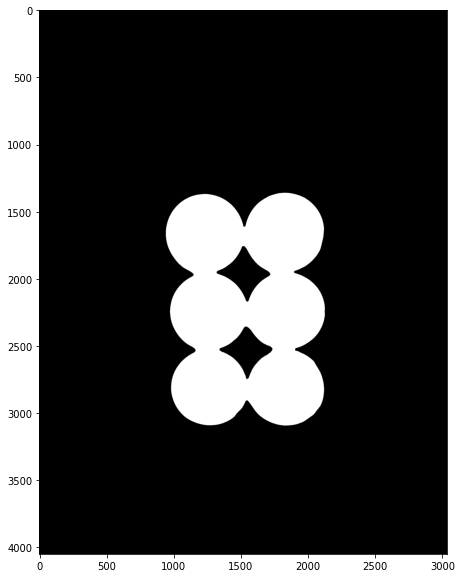

In [10]:
display(sep_thresh)

In [11]:
image, contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)


In [12]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,1,(255,0,0),10)
    

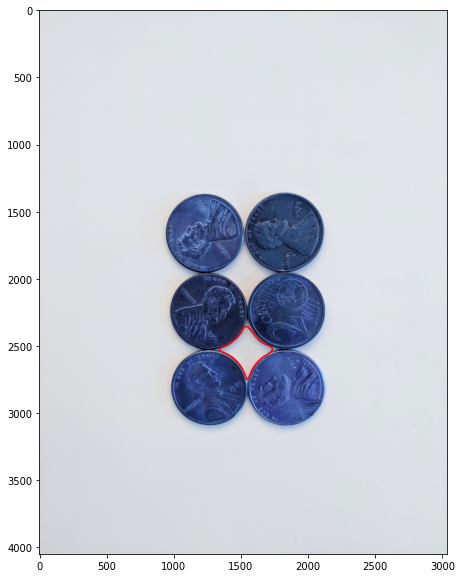

In [13]:
display(sep_coins)

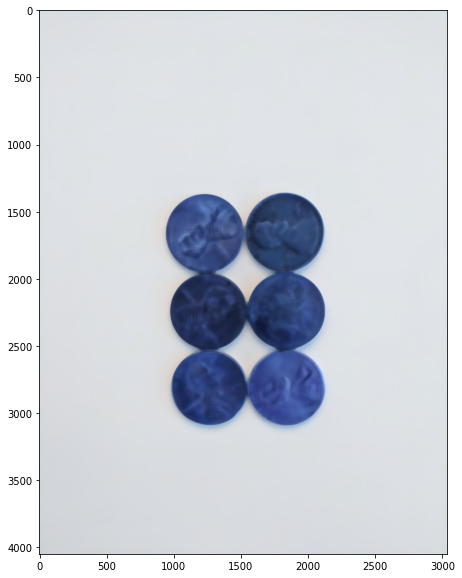

In [14]:
img = cv2.imread('pennies.jpg')
img = cv2.medianBlur(img, 35) #quite a blur
display(img)

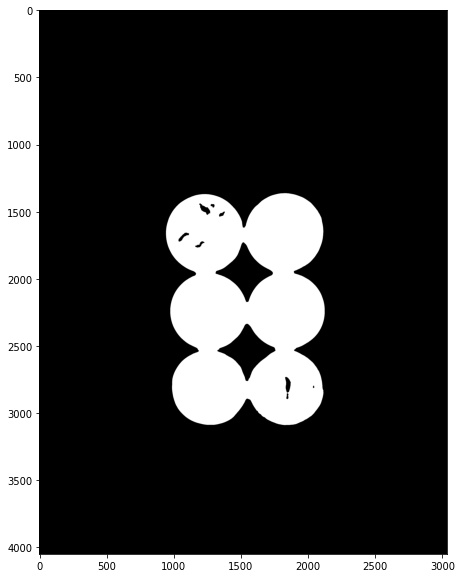

In [15]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
display(thresh)

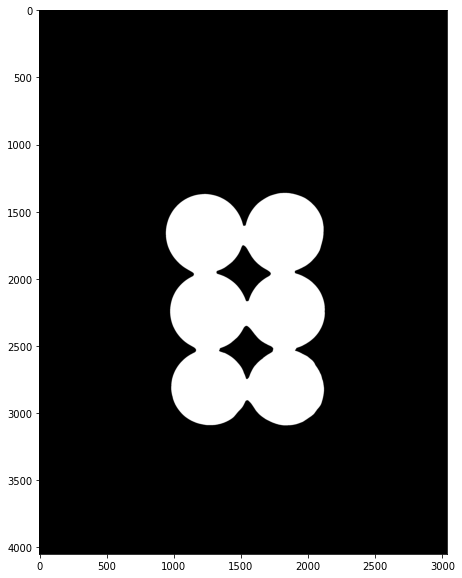

In [16]:
img = cv2.imread('pennies.jpg')
img = cv2.medianBlur(img, 35) #quite a blur
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

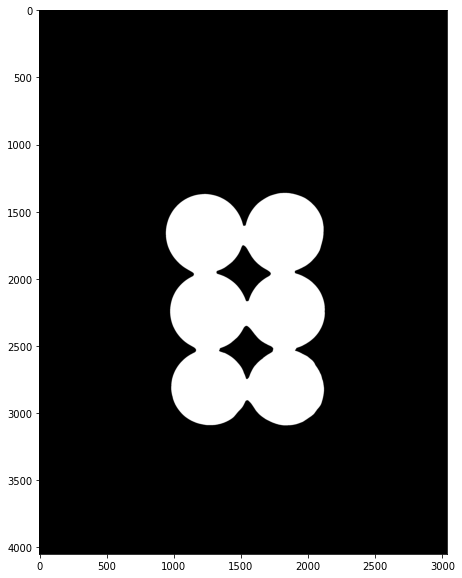

In [17]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

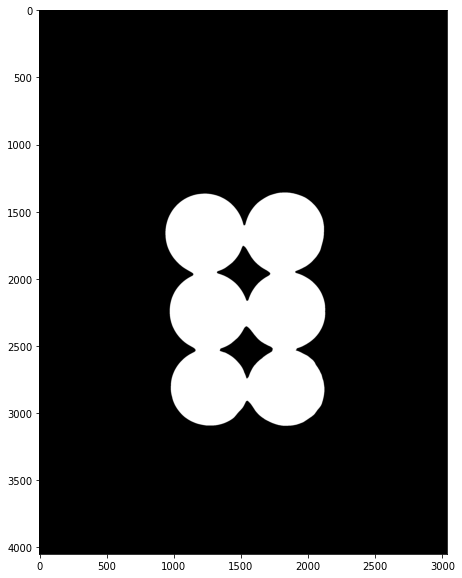

In [18]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

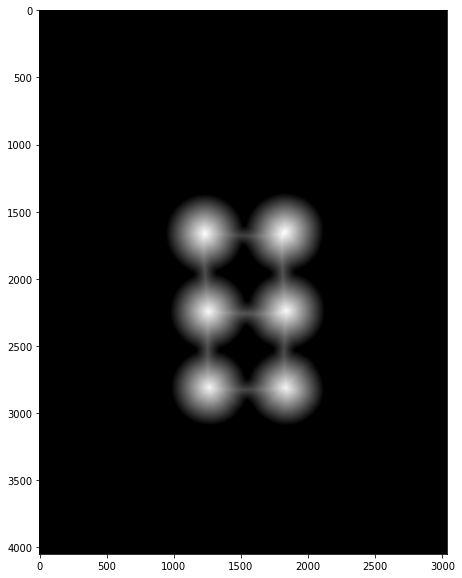

In [19]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,maskSize=5)
display(dist_transform)

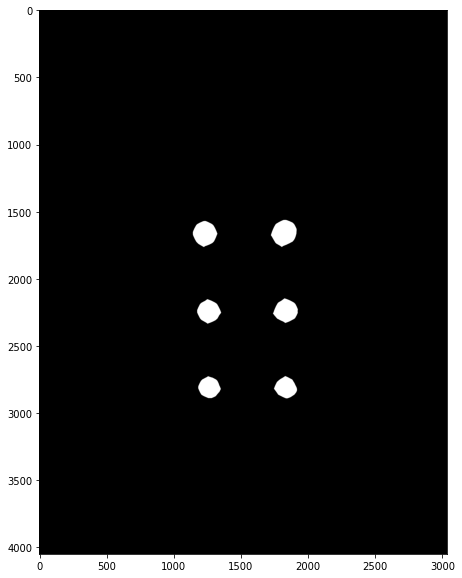

In [20]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

display(sure_fg)

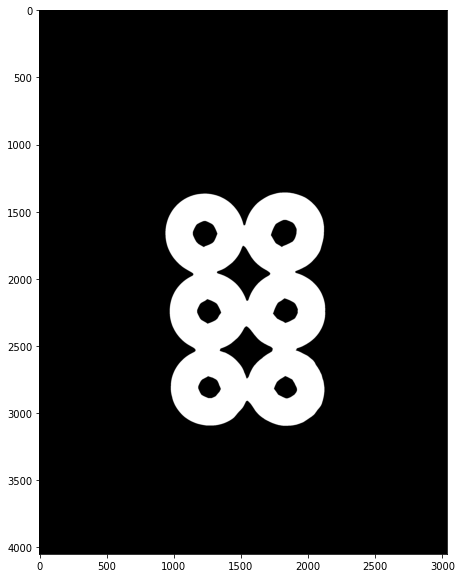

In [21]:
#watershed for unknown regions
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

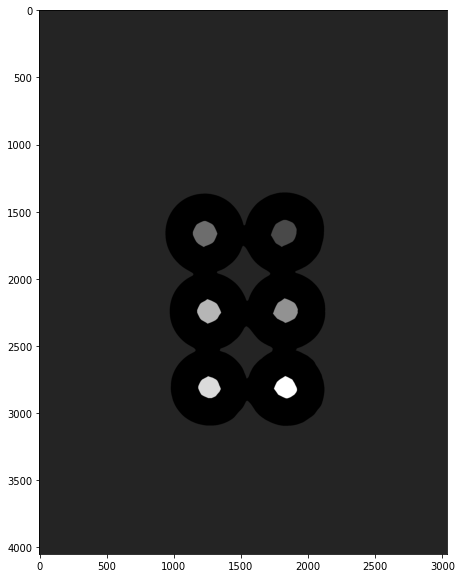

In [22]:
# 3 steps to make markers

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1 #as markers are zero

markers[unknown==255] = 0 #removing unknwon black parts

display(markers) #background is gray so we know the size of coin as well

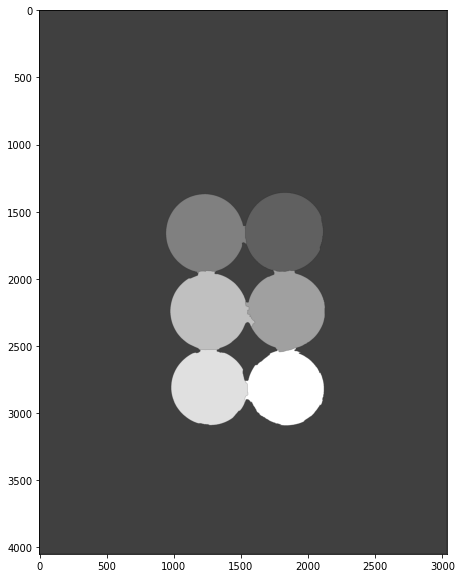

In [23]:
markers =cv2.watershed(img,markers)
display(markers) #six distinct markers

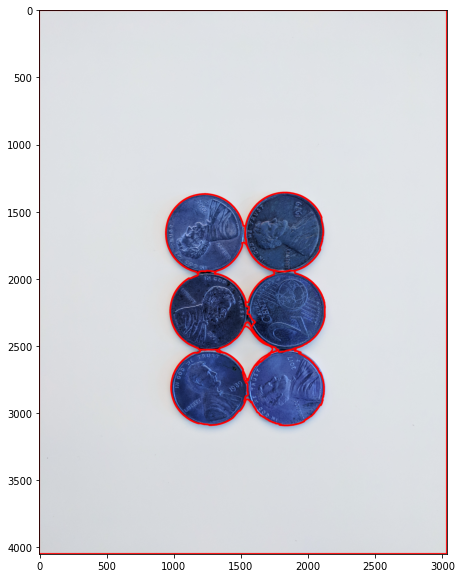

In [24]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
  if hierarchy[0][i][3] == -1:
    cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
display(sep_coins)